In [10]:
{"tags": ["hide-input"]}
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
{"tags": ["hide-input"]}
df = pd.read_csv("google.csv",squeeze = True)
print(len(df))
df.dropna(inplace = True)
df.info()


10841
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


DATA PRE PROCESSING

In [13]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [14]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [15]:
#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [16]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [17]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [18]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [19]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [20]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [21]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [22]:
df['Content Rating'].unique()

array([0, 1, 2, 3, 4, 5])

In [23]:
df.Size.sort_values()

1532          8500.0
4983         14000.0
10072        17000.0
4977         17000.0
9781         18000.0
            ...     
9170     100000000.0
5530     100000000.0
4690     100000000.0
1080     100000000.0
5862     100000000.0
Name: Size, Length: 9360, dtype: float64

ERROR CALC

In [24]:


#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [25]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = ''):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

LINEAR REGRESSION MODEL

In [26]:
#Linear model for ratings
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
pred = pd.Series(Results)
#pred.sort_values()

resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results,name = 'Linear Model'),orient = 'Index')
resultsdf = resultsdf.transpose()


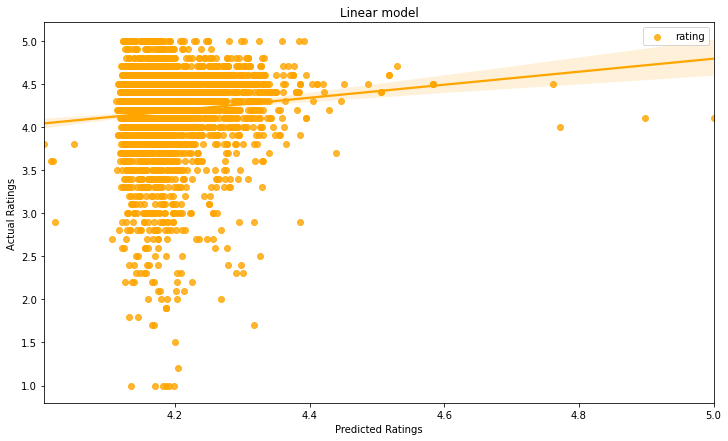

In [30]:
{"tags": ["hide-cell"]}
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='orange',label = 'rating')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [28]:
print ('Mean Ratings: ' + str(Results.mean()))

Mean Ratings: 4.195554762708735


In [29]:
print('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.27646612480849503
Mean absolute Error: 0.3664027618880484
Mean squared Log Error: 0.013647318732721122


In [66]:
dict1 = {"Mean Squared Error":metrics.mean_squared_error(y_test,Results),"Mean Absolute Error" : metrics.mean_absolute_error(y_test,Results),
        "Mean Squared Log Error ": metrics.mean_squared_log_error(y_test,Results)}

In [67]:
dict1

{'Mean Squared Error': 0.2559049489125153,
 'Mean Absolute Error': 0.3578864425344325,
 'Mean Squared Log Error ': 0.012250561877256946}

In [68]:
f = pd.Series(dict1)
f 

Mean Squared Error         0.255905
Mean Absolute Error        0.357886
Mean Squared Log Error     0.012251
dtype: float64

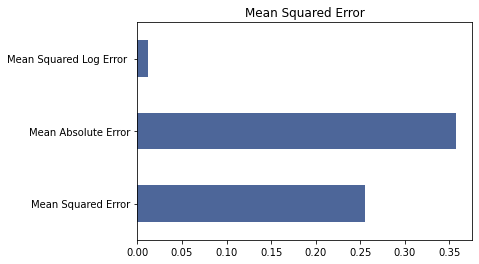

In [69]:
f.plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')

In [70]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear Model,0.255905,0.357886,0.0122506


SVM

In [71]:
from sklearn import svm
model2 = svm.SVR()

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)
pred2 = pd.Series(Results2)
pred2.sort_values()

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM model'),ignore_index = True)

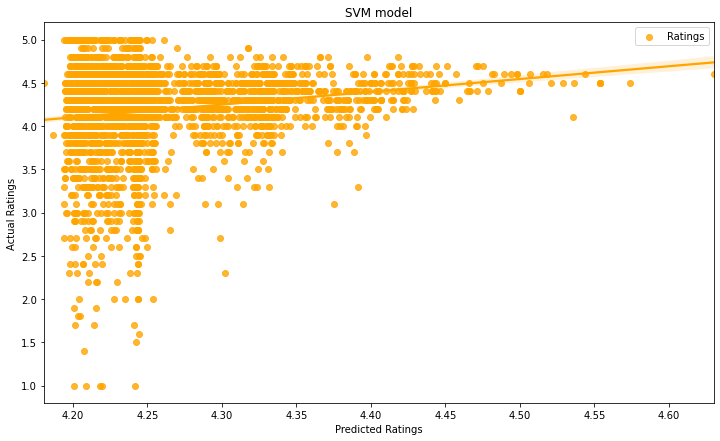

In [72]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='orange', label = 'Ratings')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [73]:
print ('Mean Ratings: ' + str(Results2.mean()))

Mean Ratings: 4.26338272025787


In [74]:
print('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results2)))
print('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results2)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results2)))

Mean Squared Error: 0.26948258259582514
Mean absolute Error: 0.34873561894902416
Mean squared Log Error: 0.013303753029292304


In [75]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear Model,0.255905,0.357886,0.0122506
1,SVM model,0.269483,0.348736,0.0133038


RANDOM FOREST MODEL

In [76]:
#random forest model for ratings
from sklearn.ensemble import RandomForestRegressor

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR Model'),ignore_index = True)

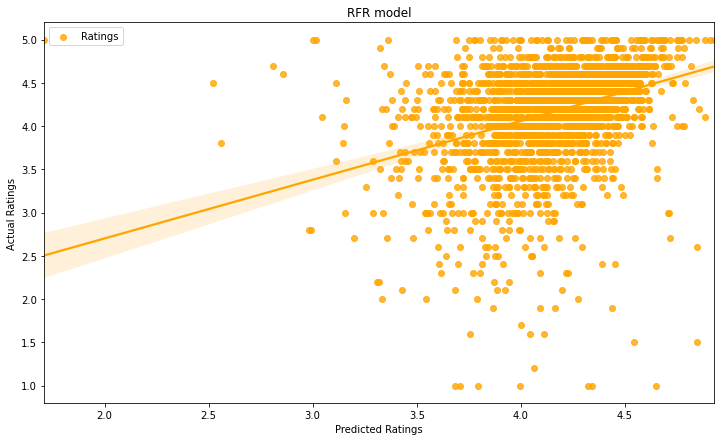

In [77]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='orange', label = 'Ratings')

plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [78]:
print ('Mean Ratings:' + str(Results3.mean()))


Mean Ratings:4.180922596153846


In [79]:
print('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results3)))
print('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results3)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results3)))

Mean Squared Error: 0.2481287916099834
Mean absolute Error: 0.3213511574074074
Mean squared Log Error: 0.012785448300273526


In [80]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear Model,0.255905,0.357886,0.0122506
1,SVM model,0.269483,0.348736,0.0133038
2,RFR Model,0.248129,0.321351,0.0127854


ERROR CALCULATION FOR ACCURACY

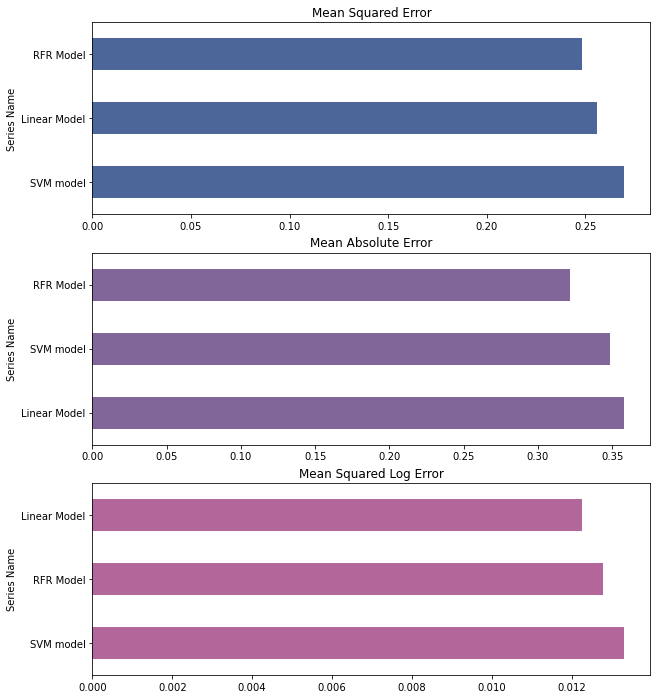

In [81]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()
